# Figure 6.
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/22/2025          |
| Updated |  08/22/2025          |

Similar to Figure 5 except at thermal equilibrium (cf. Figure 7) for the hydrostatic model that includes frequency-dependent absorption and scattering opacities across $N_f = 64$ bands.
The left half shows the frequency-integrated radial flux $F_r$ [equation (26)] and the right the equilibrium temperature $T_\mathrm{eq}$ (Section 3.3).

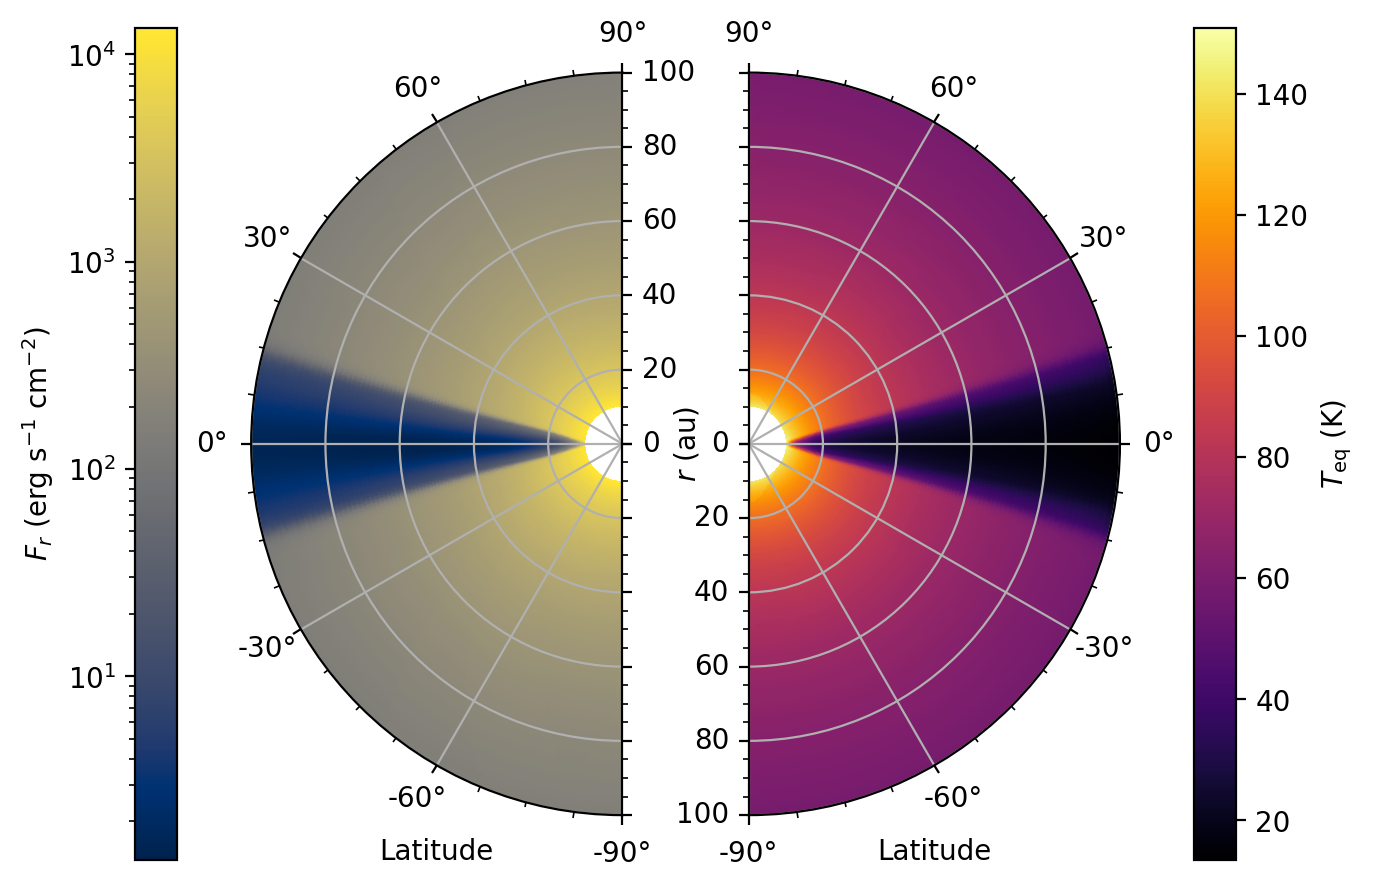

In [ ]:
#===============================================================================
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import numpy as np

# Constants
arad = 7.565733250033928e-15  # radiation constant
au = 1.495978707e13           # astronomical unit [cm]
c = 2.99792458e10             # speed of light [cm/s]

# Read and plot
fig, axs = plt.subplots(ncols=2, figsize=(8, 6), dpi=200,
                        subplot_kw=dict(projection='polar'))
problem_id = 'dsharp'
root = '../athena/models/dsharp_abs-sca'
path = f'{root}/nfreq/64'
athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
t_unit = athinput['radiation']['T_unit']
length_unit = athinput['radiation']['length_unit']
l_au = length_unit/au
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')

# Radial flux
f_r = np.zeros_like(athdf['rho'][0])
try:
    N_f = athinput['radiation']['n_frequency']
    for f in range(N_f):
        key = f'Fr_{f}_1'
        f_r += athdf[key][0]
except KeyError:
    f_r = athdf['Fr1'][0]
im0 = axs[0].pcolormesh(np.pi/2-athdf['x2f'], athdf['x1f']*l_au,
                        f_r.transpose()*c*arad*t_unit**4,
                        cmap='cividis', norm=colors.LogNorm())

# Temperature
temps = athdf['press'][0]/athdf['rho'][0]
im1 = axs[1].pcolormesh(np.pi/2-athdf['x2f'], athdf['x1f']*l_au,
                        temps.transpose()*t_unit, cmap='inferno')

# Colorbars
cbar0 = plt.colorbar(im0, label=r'$F_r$ (erg s$^{-1}$ cm$^{-2}$)',
                     location='left', pad=-0.15, shrink=0.9)
cbar1 = plt.colorbar(im1, label=r'$T_\mathrm{eq}$ (K)', pad=-0.15, shrink=0.9)

# Format plots
for i, ax in enumerate(axs):
    ax.minorticks_on()
    ax.set_xlabel(r'Latitude', loc='center', labelpad=-11)
    ax.tick_params(axis='both', which='both', top=True, left=True, right=True)
axs[0].set_theta_zero_location('W')
axs[0].set_theta_direction(-1)
axs[0].set_thetamin(90)
axs[0].set_thetamax(-90)
axs[1].set_thetamin(-90)
axs[1].set_thetamax(90)
axs[1].set_ylabel(r'$r$ (au)', labelpad=-50)
plt.subplots_adjust(wspace=-0.33)
plt.savefig('figs/thermal_equilibrium.png', dpi=600,
            bbox_inches=Bbox([[0.65, 0.87],    #[[xmin, ymin],
                              [7.55, 5.09]]))  # [xmax, ymax]]
#===============================================================================